['Arizona Diamondbacks', 'Atlanta Braves', 'Baltimore Orioles', 'Boston Red Sox', 'Chicago Cubs', 'Chicago White Sox', 'Cincinnati Reds', 'Cleveland Indians', 'Colorado Rockies', 'Detroit Tigers', 'Houston Astros', 'Kansas City Royals', 'Los Angeles Angels', 'Los Angeles Dodgers', 'Miami Marlins', 'Milwaukee Brewers', 'Minnesota Twins', 'New York Mets', 'New York Yankees', 'Oakland Athletics', 'Philadelphia Phillies', 'Pittsburgh Pirates', 'San Diego Padres', 'San Francisco Giants', 'Seattle Mariners', 'St.Louis Cardinals', 'Tampa Bay Rays', 'Texas Rangers', 'Toronto Blue Jays', 'Washington Nationals']


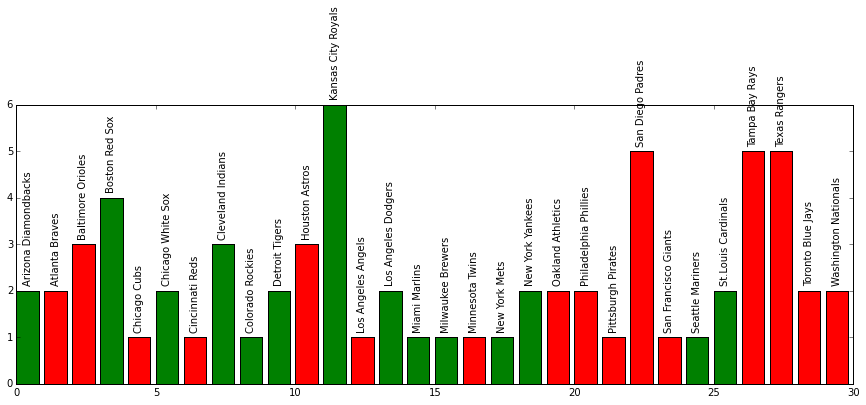

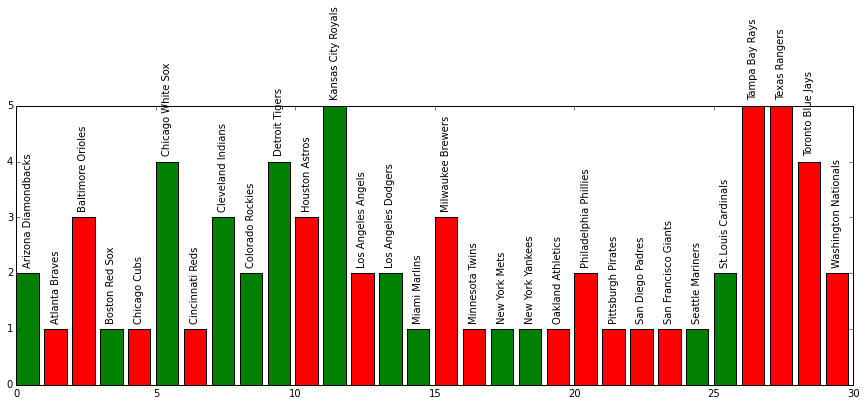

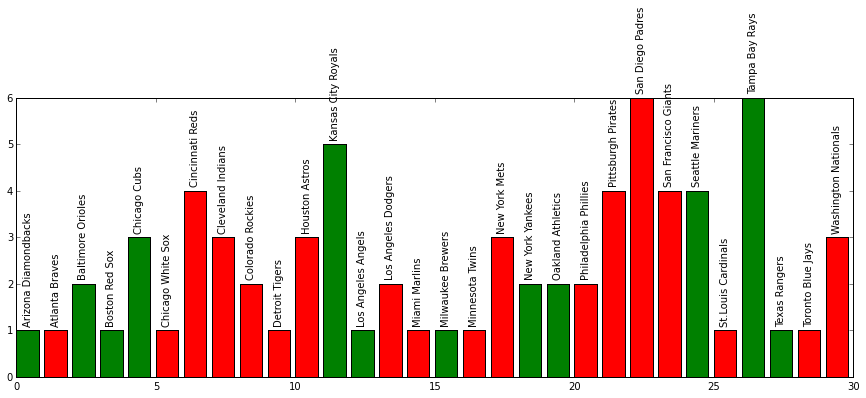

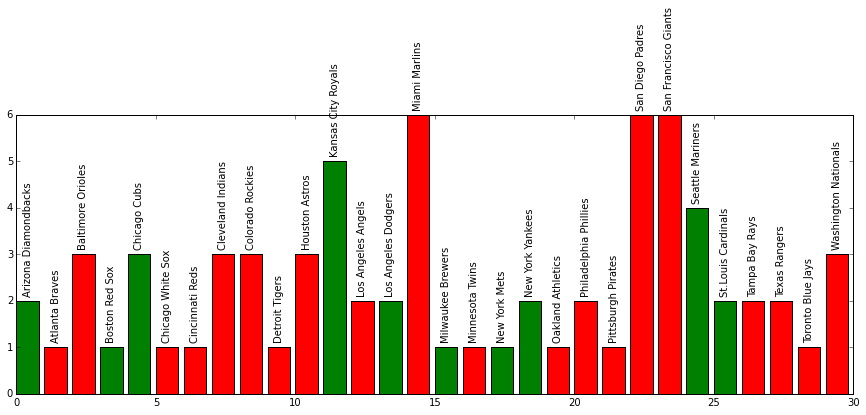

In [4]:
%matplotlib inline
from itertools import groupby
from pymongo import MongoClient
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

client = MongoClient("mongodb://localhost:27017/")
db = client["delta_test"]

# get names of all MLB teams from db
teams = db.teams.find({'module.league': 'MLB'})
team_names = sorted([team['full'] for team in teams])
print(team_names)
def grouper(arg):
    # k= True or False, t = массив серии
    # return [list(t)for k, t in groupby(arg, lambda x: x > 0)][0]
    resp = [list(t)for k, t in groupby(arg, lambda x: x > 0)][0]
    return [float(len(resp)), 'g']  if resp[0] > 0 else [float(len(resp)), 'r'] 

# 4 пустых массива
res_arr = [[] for r in range(4)]
for name in team_names:
    # print(name)
    match_list = db.matches.find({'league': 'mlb', 'season': '2015', 'seas_type': 'season',
                                  '$or': [{'home.team': name}, {'away.team': name}]})\
                                  .sort([('date.stamp', -1)])
    # line, hcap, totl, itot = [], [], [], []
    arry = [[] for r in range(4)]
    for match in match_list:
        
        """   get delta   """
        delta = match["home"]["ftot"]["delta"] if match["home"]["team"] == name\
                else match["away"]["ftot"]["delta"]
        
        """   набивает массивы по одному числу   """
        [arry[n].append(delta[n]) for n in range(4)]    
    
    # ['Atlanta Braves', [-3.0, 'r']],
    [res_arr[i].append([name, grouper(arry[i])]) for i in range(4)]

# [('dave', 'B', 10), ('jane', 'B', 12), ('john', 'A', 15)]
# >>> sorted(student_tuples, key=lambda student: student[2])
# [sorted(res_arr[m], key=lambda smth: smth[0]) for m in range(4)]

for i in range(4):
    data = [r[1][0] for r in res_arr[i]]
    clrs = [r[1][1] for r in res_arr[i]]

    # набивка баров
    plt.figure(figsize=(15, 5))
    ax = plt.axes()
    bars = ax.bar(range(len(data)), data, color=clrs)

    # вывод лейблов к барам
    for label, rect in zip(team_names, bars):
        height = rect.get_height() + 0.1
        length = rect.get_x() + rect.get_width() / 2.
        ax.text(length, height, label, ha='center', va='bottom', rotation=90)